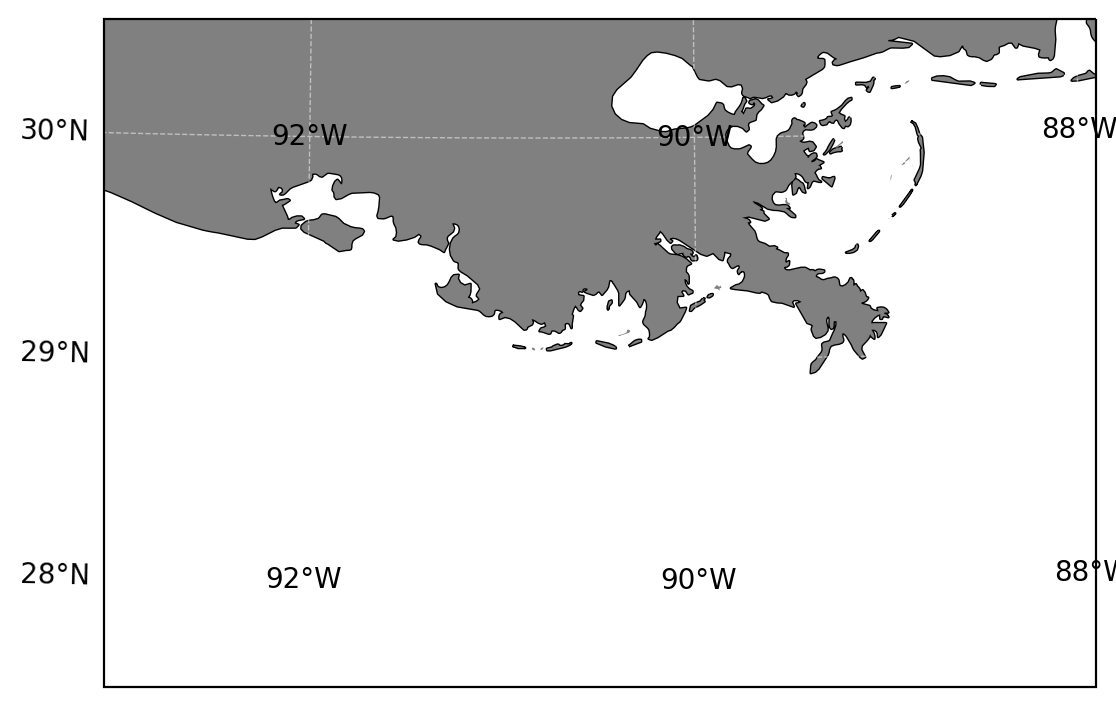

In [13]:
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr


######

lat_0, lon_0 = 28.5, -90.8

lat_top=30.5
lat_bot=27.5
lon_left=-88
lon_rigth=-93



extent=[lon_left, lon_rigth, lat_bot, lat_top]
resval = 1000
res = xr.DataArray(resval, attrs={"units": "meters"})

def plot_mapbase(extent=extent, res='10m', projection=ccrs.PlateCarree(), ax=None):
    if ax is None:
        fig = plt.figure(dpi=200) # set fig size
        ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res))
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                 ylocs=[28, 29, 30], 
                 xlocs=[-94, -92, -90, -88], 
                 draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False
    return ax

mapbase = plot_mapbase(projection= ccrs.LambertConformal(central_longitude=lon_0, central_latitude=lat_0))

########
        
        
def Cruisefigure(cruise):
    
    i=0
#     base = glob('/home/hboi-ouri/Projects/RS_Files/Task4/2022/' + month + '_MODIS_L2_aCDOM.nc')   
    base = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/'+ cruise +'*aCDOM.nc')   

    #area in the figure
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                    width=1500, height=750,
                    area_extent=extent, units='degrees')
        
    fig =  plt.figure(figsize=(6, 4), dpi=200)



    print(base)
    ds = xr.open_dataset(base[0])
    data = ds.acdom.mean('time')
    ax1 = plt.subplot(projection=ccrs.PlateCarree())
    im = data.where(data!=0).plot(ax=ax1, vmin=0, vmax=15, x='lon', y='lat', add_colorbar=False) #transform=projection)
    ax1.set_title('Test', fontsize=8)


    fig.colorbar(im, fraction=0.042, pad=0.06)

    fig.text(0.834, 0.43, 'Counts', size=13, rotation=90)


    plot_mapbase(ax=ax1)

    if cruise == 'GOM21SU':
        daterange = 'Jul15-Jul27, 2021'
    elif cruise == 'GOM21FA':
        daterange = 'Oct22-Nov14, 2021'
    elif cruise == 'GOM22SP':
        daterange = 'Apr17-Apr24, 2021'
    else:
        daterange = 'Jul6-Jul28, 2022'


    #title & save
    ax1.set_title('MODIS AQUA - GOMEX aCDOM; ' + cruise)


    #title & save
    fig.text(0.02, 0.42, 'Latitude', size=13, rotation=90)
    fig.text(0.4, 0.09, 'Longitude', size=13)
    fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task5/aCDOM' + cruise + '.png')
    fig.clear()
        


In [14]:
Cruisefigure('GOM22SU')
Cruisefigure('GOM22SP')
Cruisefigure('GOM21SU')
Cruisefigure('GOM21FA')



['/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/GOM22SU_MODIS_L2_aCDOM.nc']
['/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/GOM22SP_MODIS_L2_aCDOM.nc']
['/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/GOM21SU_MODIS_L2_aCDOM.nc']
['/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/GOM21FA_MODIS_L2_aCDOM.nc']


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>